# Introduction

**This notebook is a guide for beginners into machine learning, random forest models to be more specific. There will be comments every step of the way so there is a clear understanding. We will be building a system that predicts quality of red wine.**

# Supervised Machine Learning

**Machine learning is divided into supervised and unsupervised learning. We train our model with data that we have previously acquired in supervised learning. In unsupervised learning, we have no data that we can train our model with.**

**Supervised machine learning is divided into classification and regression. In classification, we predict discrete values, e.g. Yes/No, Customer will purchase/Won't purchase. But in regression, we predict continuous values, such as age, price, etc.**

# Random Forest

**A random forest is a machine learning technique that’s used to solve regression and classification problems. It consists of many decision trees.  It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.**

**It contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.**

# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Missing Values

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Good thing we have no missing values in this dataset so no imputation (replacing missing values with other appropriate ones) necessary.**

# Exploratory Data Analysis

<AxesSubplot:>

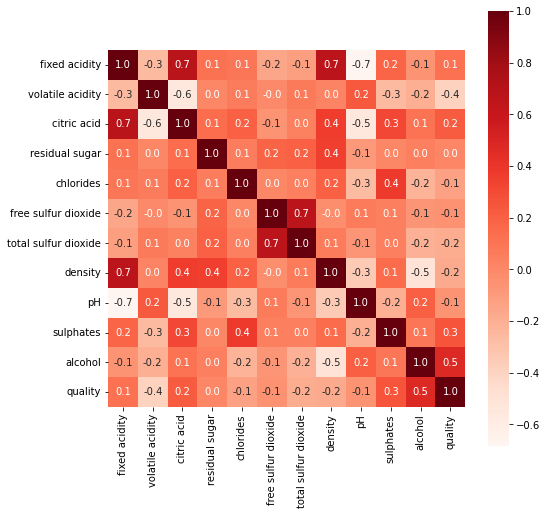

In [5]:
# We can use a heatmap to check correlation between the variables.
corr = wine_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

**We can make observations such as, as quantity of alcohol increases, the quality of red wine betters. But, as volatile acidity increases,the quality of red wine deteriorates.**

In [6]:
qs = wine_data['quality'].unique()
sorted(qs)

[3, 4, 5, 6, 7, 8]

**We can see that the quality column has the values from 3-8. No 1 or 2. 3 being the worst quality and 8, the best.**

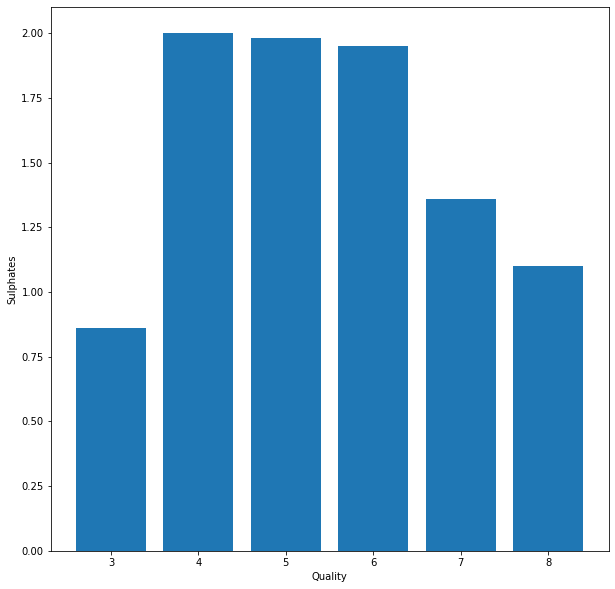

In [7]:
# Sulphates vs Quality
plt.figure(figsize=(10,10))
x = wine_data.quality
y = wine_data.sulphates
plt.bar(x,y)
plt.xlabel("Quality")
plt.ylabel("Sulphates")
plt.show()

**Mediocre quality wines have high amounts of sulphates but interestingly, both poor and great quality wines have similar amounts of sulphates.**

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

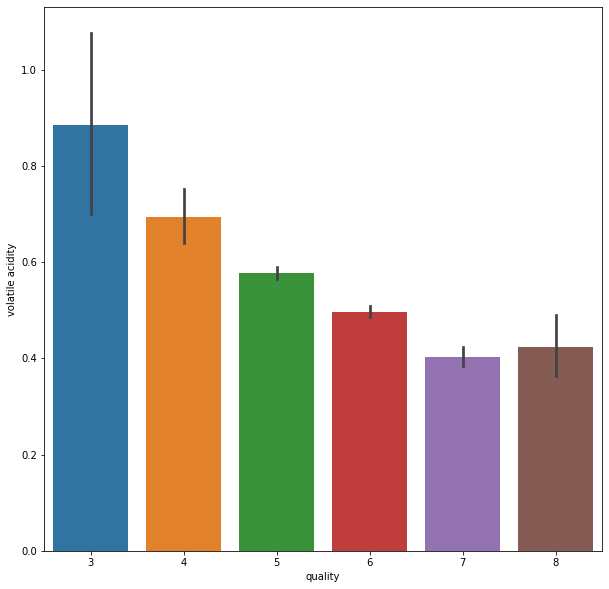

In [8]:
# Volatile Acidity vs Quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

**Wines with good quality have less volatile acidity.**

<AxesSubplot:xlabel='quality', ylabel='pH'>

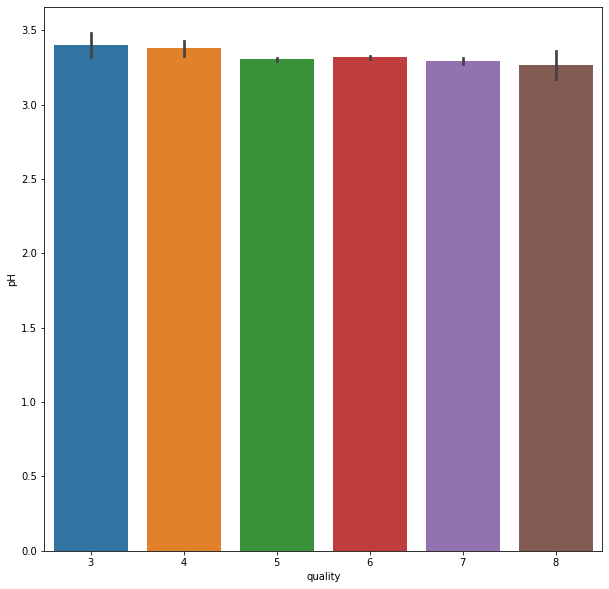

In [9]:
# pH vs Quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='pH',data=wine_data)

**pH of all types of wine are rather similar, close to 3.5, mildly acidic. But this could be disproved if there were more samples.**

<AxesSubplot:xlabel='quality', ylabel='count'>

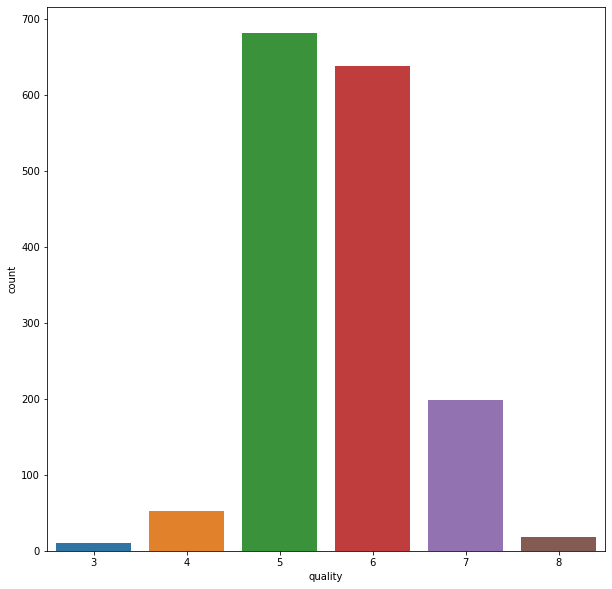

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x="quality", data=wine_data)

**We have more samples of wines with mediocre qualuty but very few samples for bad quality and great quality wines. If the dataset overall had more samples, maybe we'd have more samples for those and the results would be more reliable.**

# Splitting Data

In [11]:
# We need to split the data
X = wine_data.drop(['quality'],axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.

**Now we need to separate the quality column and store it in 'y'. But before that, we need to binarize the y labels, for example into 1/0 to represent good/bad. We need to do this as there are way too many labels in that column.**

In [12]:
# Binarization
# this function will take each wine quality and if it is 6 or more, it will be labelled as 1/'good' wine.
y = wine_data['quality'].apply(lambda quality: 1 if quality >= 6 else 0)

In [13]:
# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.

In [14]:
print(X.shape,X_train.shape)

(1599, 11) (1279, 11)


**As we can see, 1279 rows are used for testing out of 1599 which is about 80% of the data.**

# Model Building

**We're going to use a random forest model.**

In [15]:
model = RandomForestClassifier()

In [16]:
# Now we need to train the model
model.fit(X_train,y_train) # fitting means training

RandomForestClassifier()

# Prediction and Evaluation of the Model

**First, we need to use the model to predict good/poor quality from the training data. Then, we check our model's accuracy using accuracy score.**

In [17]:
train_pred = model.predict(X_train)
train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
# Now let's check accuracy score on training data
Training_score = accuracy_score(train_pred,y_train) #(Basically comparing the original y_train and predictions and seeing difference/error)
print("Accuracy Score:",Training_score)

Accuracy Score: 1.0


**Our model is 100% accurate on training data. WOAH.**

**But keep in mind that we used training data to check accuracy. We need to check using test data for a better understanding.**

In [19]:
test_pred = model.predict(X_test)
test_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,

In [20]:
# Accuracy Score
Test_score = accuracy_score(test_pred,y_test) 
print("Accuracy Score:",Test_score)

Accuracy Score: 0.790625


**BUT, the model is only about 77% accurate on test data. 75+ % is good enough but it could be better. Maybe, if we used some other model.**

# Conclusion

So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> Exploratory Data Analysis -> split data -> train model -> check its accuracy -> improve model or try other ones.

**To get better accuracy, try different models or use more training data.**